# Album-art genre classifier

## Experiment 3:
- Four output classes, 20552 images
- Slight imbalance in dataset
- Dataset created after removing duplicate artists (not done previously)

## Summary:
- Getting similar error rate as in exp 1, ie, between 25 and 30%, not seeing benefit of increasing number of images

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.vision import *

In [3]:
classes = ['heavy_metal', 'hip-hop', 'pop', 'rock']

In [3]:
DATA_PATH = '../local_only_data/exp3'

In [7]:
for class_name in classes:
    !wc -l {DATA_PATH}/{class_name}.txt

4258 ../local_only_data/exp3/heavy_metal.txt
7251 ../local_only_data/exp3/hip-hop.txt
5444 ../local_only_data/exp3/pop.txt
4850 ../local_only_data/exp3/rock.txt


In [8]:
MAX_PICS = 6000

In [9]:
for class_name in classes:
    
    print(class_name)
    
    folder = class_name
    file = f'{class_name}.txt'
    
    path = Path(DATA_PATH)
    dest = path/folder
    dest.mkdir(parents=True, exist_ok=True)
    
    download_images(path/file, dest, max_pics=MAX_PICS)

heavy_metal


hip-hop


pop


rock


In [4]:
BATCH_SIZE = 64

In [5]:
path = Path(DATA_PATH)

In [17]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.08,
        ds_tfms=get_transforms(do_flip=False, max_rotate=0.2, max_warp=0.2), size=224, num_workers=4, bs=BATCH_SIZE).normalize(imagenet_stats)

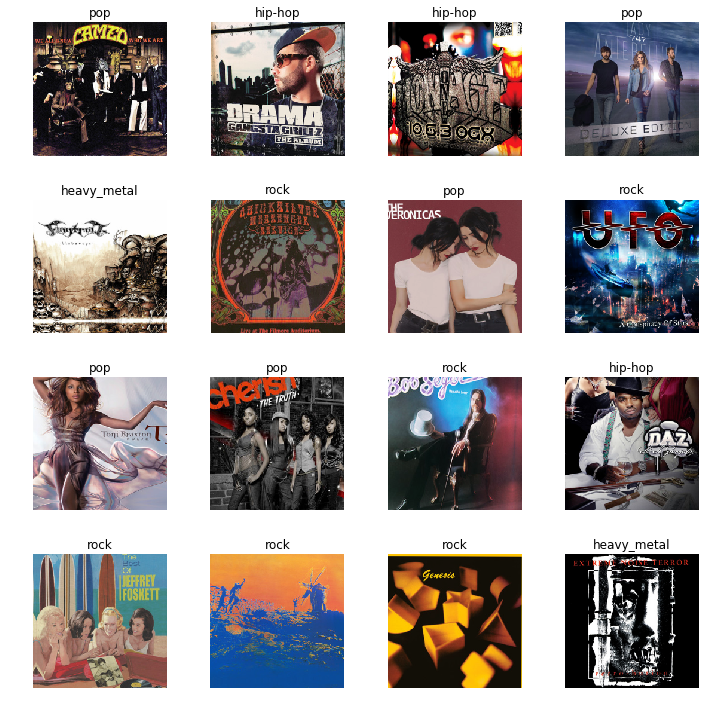

In [18]:
data.show_batch(rows=4, figsize=(10,10))

In [19]:
print(data.classes)
print(f'Training size: {len(data.train_ds)}')
print(f'Validation size: {len(data.valid_ds)}')
print(f'Total: {len(data.train_ds) + len(data.valid_ds)}')

['heavy_metal', 'hip-hop', 'pop', 'rock']
Training size: 18869
Validation size: 1683
Total: 20552


## Training: ResNet-34

In [17]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

In [18]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


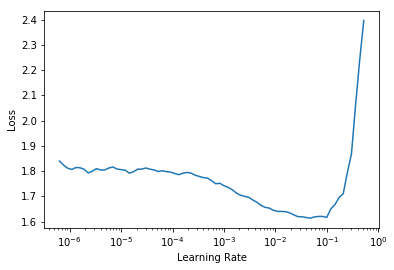

In [19]:
learn.recorder.plot()

In [20]:
lr = 1e-3

In [22]:
learn.fit_one_cycle(4, lr)

Total time: 09:08
epoch  train_loss  valid_loss  error_rate
1      1.160710    1.008339    0.409674    (02:17)
2      1.012004    0.907263    0.367226    (02:17)
3      0.927673    0.852847    0.355380    (02:16)
4      0.861199    0.844440    0.339585    (02:16)



In [47]:
learn.save('2-classes-3975-im-stage-1')

In [23]:
interp = ClassificationInterpretation.from_learner(learn)

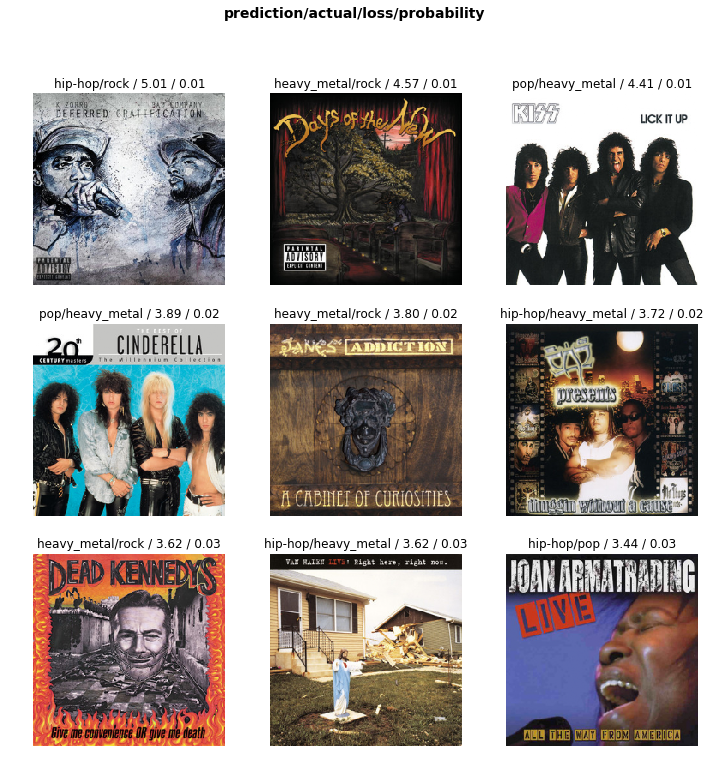

In [24]:
interp.plot_top_losses(9, figsize=(12,12))

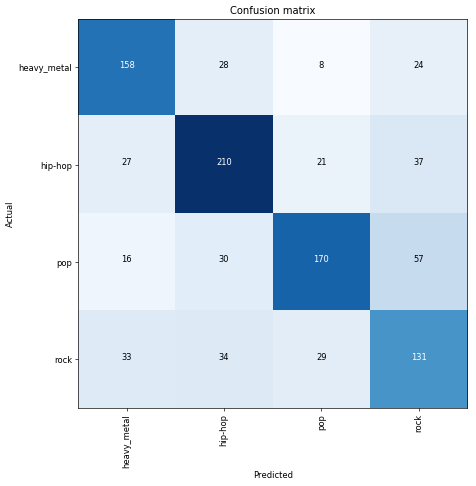

In [25]:
interp.plot_confusion_matrix(figsize=(8,8), dpi=60)

In [26]:
learn.unfreeze()

In [27]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


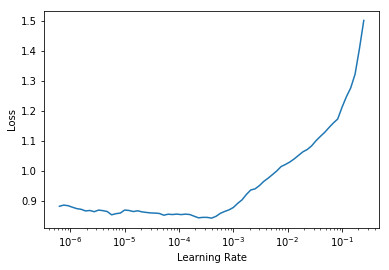

In [28]:
learn.recorder.plot()

In [29]:
learn.fit_one_cycle(4, max_lr=slice(1e-5,8e-5))

Total time: 13:20
epoch  train_loss  valid_loss  error_rate
1      0.823179    0.815943    0.331688    (03:20)
2      0.758948    0.752879    0.287266    (03:20)
3      0.577365    0.723670    0.277394    (03:19)
4      0.458483    0.725857    0.272458    (03:20)



In [54]:
learn.save('2-classes-3975-im-stage-2')

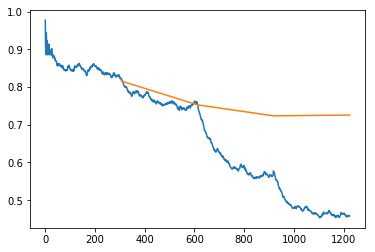

In [30]:
learn.recorder.plot_losses()

## Training ResNet-50

In [20]:
learn2 = create_cnn(data, models.resnet50, metrics=error_rate)

In [21]:
learn2.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


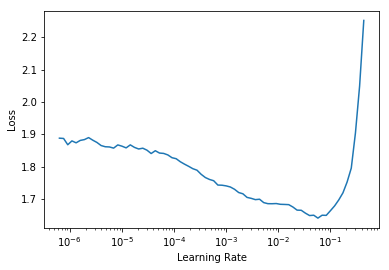

In [22]:
learn2.recorder.plot()

In [23]:
lr = 1e-3

In [24]:
learn2.fit_one_cycle(4, max_lr=lr)

Total time: 18:51
epoch  train_loss  valid_loss  error_rate
1      1.168861    0.980813    0.393939    (04:53)
2      0.971918    0.890865    0.351753    (04:39)
3      0.876611    0.838193    0.339869    (04:39)
4      0.792497    0.822507    0.332739    (04:39)



In [11]:
learn2.unfreeze()

In [12]:
learn2.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


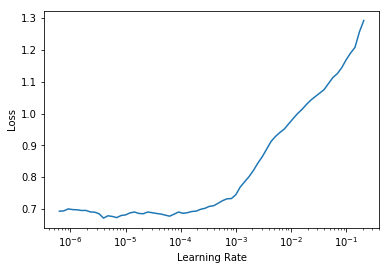

In [13]:
learn2.recorder.plot()

In [14]:
learn2.fit_one_cycle(5, max_lr=5e-6)

Total time: 34:53
epoch  train_loss  valid_loss  error_rate
1      0.700028    0.774177    0.307996    (07:00)
2      0.685965    0.761438    0.306022    (06:58)
3      0.656299    0.751252    0.303060    (06:58)
4      0.610902    0.747939    0.299112    (06:58)
5      0.590860    0.751221    0.304047    (06:58)

